In [1]:
pip install scipy


In [2]:
import tensorflow as tf
from tensorflow import keras
from keras.layers import Dense
from keras.regularizers import l2
from keras.models import Sequential
from keras import regularizers

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from scipy import signal
from scipy import interpolate

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import pyproj
from sklearn.preprocessing import MinMaxScaler
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam
from sklearn.model_selection import train_test_split

In [5]:
from google.colab import drive
import pandas as pd
drive.mount('/content/drive')

Mounted at /content/drive


# Data Prep

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Data')
df

,Unnamed: 0.2,Unnamed: 0.1,Unnamed: 0,t_gps_sec,alt,xyz_0,t_xyz_sec,xyz_1,xyz_2,q_0,...,t_c_sec,c2_pitch,c3_throttle,roll,pitch,yaw,lon,lat,x_axis,y_axis
0,0,0,0,0.000000,0.000000,-0.025227,0.000000,0.051710,0.036490,-0.550386,...,0.000000,1500.000000,998.0,-3.618678,0.381745,113.162801,88.303930,22.555872,16795.139732,2.501964e+06
1,1,1,1,0.109609,79.122426,0.020328,0.109473,0.099811,-0.002836,-0.549877,...,0.109605,1500.000000,998.0,-3.608857,0.847924,113.216640,88.303930,22.555873,16795.123327,2.501964e+06
2,2,2,2,0.219218,138.425565,0.039619,0.218945,-0.045201,-0.048510,-0.550789,...,0.219210,1500.000000,998.0,-3.411084,1.019822,113.090701,88.303930,22.555873,16795.107931,2.501964e+06
3,3,3,3,0.328827,136.063858,0.035581,0.328418,-0.075888,-0.091753,-0.554199,...,0.328815,1500.000000,998.0,-3.132182,0.622868,112.641951,88.303930,22.555873,16795.095677,2.501964e+06
4,4,4,4,0.438436,133.702151,0.001672,0.437890,-0.104955,-0.094228,-0.558308,...,0.438420,1500.000000,998.0,-3.055991,-0.031660,112.095528,88.303930,22.555873,16795.083423,2.501964e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,4995,4995,4995,547.497137,6042.560744,-0.787299,546.815530,0.856096,0.188109,0.948763,...,547.477516,1386.991772,1600.0,5.773752,-6.283896,-36.183352,88.304484,22.556059,16852.848974,2.501983e+06
4996,4996,4996,4996,547.606746,6095.848595,0.444530,546.925003,0.370571,-0.142470,0.952545,...,547.587122,1397.350327,1600.0,2.784687,-3.387301,-35.247454,88.304481,22.556063,16852.518237,2.501983e+06
4997,4997,4997,4997,547.716355,6149.136446,-0.570763,547.034475,-1.010787,-0.239736,0.949180,...,547.696727,1386.512745,1600.0,4.434605,1.472464,-36.317071,88.304477,22.556067,16852.187500,2.501984e+06
4998,4998,4998,4998,547.825964,6202.424297,-0.896305,547.143948,1.305357,0.240863,0.950381,...,547.806332,1375.675163,1600.0,-0.580218,2.558557,-36.093664,88.304474,22.556071,16851.856763,2.501984e+06


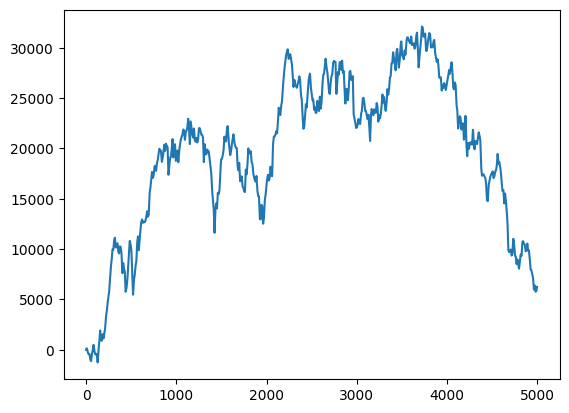

In [ ]:
plt.plot(df['alt'])

In [ ]:

def gps2xy(longitude,latitude):
  # Example Coordinates (Adjust these to your actual data)
  #latitude = 28.6129  # Example: Delhi, India
  #longitude = 77.2304

  # Define the source and target coordinate systems
  wgs84 = pyproj.CRS('EPSG:4326')  # Standard GPS coordinates

  # Determine UTM zone for your location in India
  # India covers multiple UTM zones (40-47)
  # Use a reference source (e.g., https://epsg.io/) to find the zone
  # for your specific coordinates. Here, we'll assume zone 46 for Delhi.
  utm_zone = 46

  # Construct the UTM CRS for India zone
  utm_crs = pyproj.CRS(f'EPSG:326{utm_zone}')

  # Create a transformation object
  transformer = pyproj.Transformer.from_crs(wgs84, utm_crs, always_xy=True)

  # Perform the transformation
  x, y = transformer.transform(longitude, latitude)

  #print(f"Indian UTM Coordinates (Zone {utm_zone}): X = {x:.2f}, Y = {y:.2f}")
  return [x,y]

In [ ]:
xx=[]
yy=[]
for i in range(df.shape[0]):
  x=df['lon'][i]
  y=df['lat'][i]
  gps2xy(x,y)
  xx.append(gps2xy(x,y)[0])
  yy.append(gps2xy(x,y)[1])

In [ ]:
print(xx)

[16795.139731963864, 16795.123326873872, 16795.107931392675, 16795.09567716904, 16795.0834229443, 16795.07116871793, 16795.058914493187, 16795.046660268446, 16795.034406042425, 16795.02250427514, 16795.018074631807, 16795.01364498888, 16795.0092153445, 16795.004785701458, 16795.00035605696, 16794.99592641258, 16794.991496770876, 16794.98706712766, 16794.982637484674, 16794.98391573009, 16794.985337327, 16794.986758925428, 16794.98818052397, 16794.98960212106, 16794.991023719544, 16794.99244531669, 16794.993866915116, 16794.995288510923, 16794.991021661903, 16794.98494235467, 16794.978863048542, 16794.97278374125, 16794.966704435355, 16794.960625128006, 16794.954545822053, 16794.948466514878, 16794.9423872091, 16794.945076547912, 16794.951899542357, 16794.958722535695, 16794.96554553014, 16794.97236852598, 16794.979191519145, 16794.986014515103, 16794.99283750949, 16794.999660503934, 16795.054270438442, 16795.145590809, 16795.236911179905, 16795.328231552034, 16795.41955192288, 16795.51

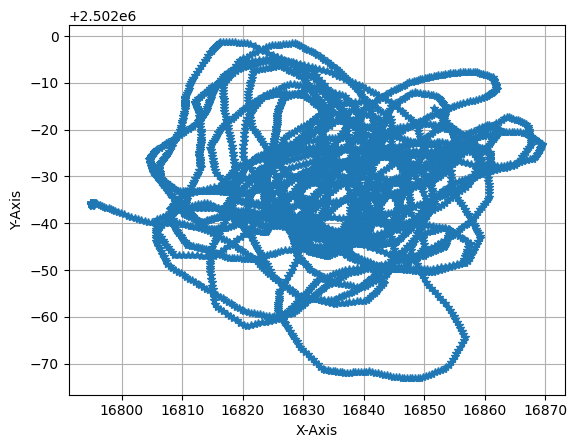

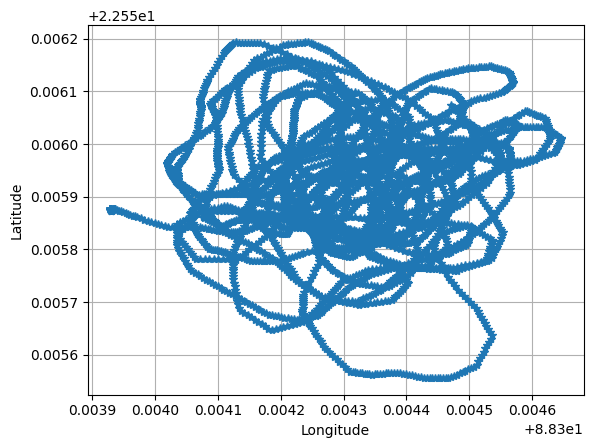

In [ ]:
plt.plot(xx,yy,'*-')
plt.xlabel('X-Axis')
plt.ylabel('Y-Axis')
plt.grid()
plt.show()
plt.plot(df['lon'],df['lat'],'*-')
plt.xlabel('Longitude')
plt.ylabel('Latitude')
plt.grid()
plt.show()

In [ ]:
xx = xx[:df.shape[0]]
yy = yy[:df.shape[0]]
df['x_axis'] = xx
df['y_axis'] = yy
#df.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Data')

In [ ]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Data')


In [ ]:
df['x_axis'] = df['x_axis']-df['x_axis'][0]
df['y_axis'] = df['y_axis']-df['y_axis'][0]
columns_to_average = ['t_xyz_sec', 't_c_sec', 't_q_sec','t_gps_sec']
df['time'] = df[columns_to_average].mean(axis=1)

df.drop(columns=['Unnamed: 0', 'Unnamed: 0.1', 'Unnamed: 0.2','t_gps_sec','t_c_sec','t_xyz_sec','t_q_sec'])



,alt,xyz_0,xyz_1,xyz_2,q_0,q_1,q_2,q_3,c1_roll,c2_pitch,c3_throttle,roll,pitch,yaw,lon,lat,x_axis,y_axis,time
0,0.000000,-0.025227,0.051710,0.036490,-0.550386,0.020168,0.024520,-0.834306,1500.000000,1500.000000,998.0,-3.618678,0.381745,113.162801,88.303930,22.555872,0.000000,0.000000,0.000000
1,79.122426,0.020328,0.099811,-0.002836,-0.549877,0.023504,0.022219,-0.834619,1500.000000,1500.000000,998.0,-3.608857,0.847924,113.216640,88.303930,22.555873,-0.016405,0.038451,0.109539
2,138.425565,0.039619,-0.045201,-0.048510,-0.550789,0.023829,0.019927,-0.834066,1500.000000,1500.000000,998.0,-3.411084,1.019822,113.090701,88.303930,22.555873,-0.031801,0.072522,0.219079
3,136.063858,0.035581,-0.075888,-0.091753,-0.554199,0.019677,0.019730,-0.831916,1500.000000,1500.000000,998.0,-3.132182,0.622868,112.641951,88.303930,22.555873,-0.044055,0.092967,0.328618
4,133.702151,0.001672,-0.104955,-0.094228,-0.558308,0.014664,0.022273,-0.829204,1500.000000,1500.000000,998.0,-3.055991,-0.031660,112.095528,88.303930,22.555873,-0.056309,0.113412,0.438157
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4995,6042.560744,-0.787299,0.856096,0.188109,0.948763,0.030803,-0.067652,-0.307059,1496.861132,1386.991772,1600.0,5.773752,-6.283896,-36.183352,88.304484,22.556059,57.709242,18.894377,547.148932
4996,6095.848595,0.444530,0.370571,-0.142470,0.952545,0.014202,-0.035515,-0.301867,1446.501054,1397.350327,1600.0,2.784687,-3.387301,-35.247454,88.304481,22.556063,57.378505,19.356029,547.258471
4997,6149.136446,-0.570763,-1.010787,-0.239736,0.949180,0.040764,0.000142,-0.311877,1343.875790,1386.512745,1600.0,4.434605,1.472464,-36.317071,88.304477,22.556067,57.047768,19.817680,547.368011
4998,6202.424297,-0.896305,1.305357,0.240863,0.950381,0.002106,0.022799,-0.309652,1241.250527,1375.675163,1600.0,-0.580218,2.558557,-36.093664,88.304474,22.556071,56.717031,20.279332,547.477550


In [ ]:
df_n=df[['time','xyz_0','xyz_1','xyz_2','roll','pitch','yaw','x_axis','y_axis','alt','c1_roll','c2_pitch','c3_throttle']]
#df_n.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Filter')

In [ ]:
columns_to_average = ['t_xyz_sec', 't_c_sec', 't_q_sec','t_gps_sec']
df['time'] = df[columns_to_average].mean(axis=1)
df



# Learning!

In [6]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Filter')


In [7]:
Roll_max=df['roll'].max()
Roll_min=df['roll'].min()
Pitch_min=df['pitch'].min()
Pitch_max=df['pitch'].max()
Yaw_min=df['yaw'].min()
Yaw_max=df['yaw'].max()
C_min=900
C_max=2100

Normalization

In [8]:
df=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Filter')

df['roll']=(df['roll']-Roll_min)/(Roll_max-Roll_min)
df['pitch']=(df['pitch']-Pitch_min)/(Pitch_max-Pitch_min)
df['yaw']=(df['yaw']-Yaw_min)/(Yaw_max-Yaw_min)
df['c1_roll']=(df['c1_roll']-C_min)/(C_max-C_min)
df['c2_pitch']=(df['c2_pitch']-C_min)/(C_max-C_min)
df['c3_throttle']=(df['c3_throttle']-C_min)/(C_max-C_min)

df['x_norm']=(df['x_axis']-df['x_axis'].min())/(df['x_axis'].max()-df['x_axis'].min())
df['y_norm']=(df['y_axis']-df['y_axis'].min())/(df['y_axis'].max()-df['y_axis'].min())
df['alt_norm']=(df['alt']-df['alt'].min())/(df['alt'].max()-df['alt'].min())

df['time_diff']=df['time'].shift(-1)-df['time']
df['time_diff_norm']=(df['time_diff']-df['time_diff'].min())/(df['time_diff'].max()-df['time_diff'].min())

In [9]:
df.dropna()

,Unnamed: 0,time,xyz_0,xyz_1,xyz_2,roll,pitch,yaw,x_axis,y_axis,alt,c1_roll,c2_pitch,c3_throttle,x_norm,y_norm,alt_norm,time_diff,time_diff_norm
0,0,0.000000,-0.025227,0.051710,0.036490,0.560823,0.493889,0.814841,0.000000,0.000000,0.000000,0.500000,0.500000,0.081667,0.002649,0.513140,0.037621,0.109539,0.577295
1,1,0.109539,0.020328,0.099811,-0.002836,0.560909,0.499154,0.814991,-0.016405,0.038451,79.122426,0.500000,0.500000,0.081667,0.002429,0.513676,0.039992,0.109539,0.577588
2,2,0.219079,0.039619,-0.045201,-0.048510,0.562649,0.501096,0.814641,-0.031801,0.072522,138.425565,0.500000,0.500000,0.081667,0.002222,0.514151,0.041769,0.109539,0.577734
3,3,0.328618,0.035581,-0.075888,-0.091753,0.565103,0.496612,0.813394,-0.044055,0.092967,136.063858,0.500000,0.500000,0.081667,0.002058,0.514435,0.041698,0.109539,0.577539
4,4,0.438157,0.001672,-0.104955,-0.094228,0.565773,0.489220,0.811875,-0.056309,0.113412,133.702151,0.500000,0.500000,0.081667,0.001893,0.514720,0.041628,0.109539,0.577734
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4994,4994,547.039393,0.479818,-0.383121,-0.196447,0.676488,0.428470,0.400477,58.039978,18.432726,5989.272892,0.491920,0.377959,0.583333,0.781831,0.769898,0.217111,0.109539,0.600000
4995,4995,547.148932,-0.787299,0.856096,0.188109,0.643447,0.418607,0.399730,57.709242,18.894377,6042.560744,0.497384,0.405826,0.583333,0.777391,0.776328,0.218708,0.109539,0.200000
4996,4996,547.258471,0.444530,0.370571,-0.142470,0.617152,0.451321,0.402332,57.378505,19.356029,6095.848595,0.455418,0.414459,0.583333,0.772951,0.782759,0.220305,0.109539,1.000000
4997,4997,547.368011,-0.570763,-1.010787,-0.239736,0.631666,0.506208,0.399359,57.047768,19.817680,6149.136446,0.369896,0.405427,0.583333,0.768511,0.789189,0.221902,0.109539,0.200000


In [ ]:
#df.to_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Filter_norm')


Features

In [11]:

X = df[['time_diff_norm','roll','pitch','yaw','x_norm','y_norm','alt_norm']]
y = df[['c1_roll','c2_pitch','c3_throttle']]



In [12]:
def round_to_6(col):
    """Rounds all values in a column to 6 decimal places."""
    return col.apply(lambda x: round(x, 6))


In [13]:
X = X.apply(round_to_6)  # Apply the function to all columns in X
X = X.fillna(0.1)
X

,time_diff_norm,roll,pitch,yaw,x_norm,y_norm,alt_norm
0,0.577295,0.560823,0.493889,0.814841,0.002649,0.513140,0.037621
1,0.577588,0.560909,0.499154,0.814991,0.002429,0.513676,0.039992
2,0.577734,0.562649,0.501096,0.814641,0.002222,0.514151,0.041769
3,0.577539,0.565103,0.496612,0.813394,0.002058,0.514435,0.041698
4,0.577734,0.565773,0.489220,0.811875,0.001893,0.514720,0.041628
...,...,...,...,...,...,...,...
4995,0.200000,0.643447,0.418607,0.399730,0.777391,0.776328,0.218708
4996,1.000000,0.617152,0.451321,0.402332,0.772951,0.782759,0.220305
4997,0.200000,0.631666,0.506208,0.399359,0.768511,0.789189,0.221902
4998,1.000000,0.587552,0.518474,0.399980,0.764071,0.795620,0.223499


In [14]:
#time Series Split
training_size=int(len(df)*0.75)
X_train,X_test=df.loc[:training_size,['time_diff_norm','roll','pitch','yaw','x_norm','y_norm','alt_norm']],df.loc[training_size:,['time_diff_norm','roll','pitch','yaw','x_norm','y_norm','alt_norm']]
y_train,y_test=df.loc[:training_size,['c1_roll','c2_pitch','c3_throttle']],df.loc[training_size:,['c1_roll','c2_pitch','c3_throttle']]

#DNN

In [15]:
model = Sequential()
model.add(Dense(32, activation='relu', input_shape=(7,)))  # Input layer, 32 neurons
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(16, activation='relu'))  # Hidden Layer
model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons (matching your output parameters)


TESTING


In [ ]:
# from keras import regularizers
# from keras.layers import Dropout

# model = Sequential()
# model.add(Dense(32, activation='relu', input_shape=(7,), kernel_regularizer=regularizers.l2(0.01)))  # Input layer with L2 regularization
# model.add(Dense(64, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Hidden layer with L2 regularization
# model.add(Dense(16, activation='relu', kernel_regularizer=regularizers.l2(0.01)))  # Hidden layer with L2 regularization
# #model.add(Dropout(0.5))  # Dropout layer to prevent overfitting
# model.add(Dense(3, activation='linear'))  # Output layer with 3 neurons (matching your output parameters)


#LSTM


In [ ]:
from tensorflow.keras.layers import LSTM, Dense

# Same data preparation as before (X, y, training/test split)

model_LSTM = Sequential()
model_LSTM.add(LSTM(32, return_sequences=True, input_shape=(X_train.shape[1], 1)))  # Input layer for sequences
model_LSTM.add(LSTM(64))  # LSTM layer with 64 memory units
model_LSTM.add(Dense(16, activation='relu'))  # Hidden layer (optional)
model_LSTM.add(Dense(3, activation='linear'))  # Output layer with 3 neurons

# model.compile(loss='mse', optimizer='adam')  # Compile with mean squared error loss and Adam optimizer
# model.fit(X_train.values.reshape(-1, 7, 1), y_train, epochs=100, batch_size=32)  # Train the model

# # Make predictions on test data (reshape for LSTM input format)
# y_pred = model.predict(X_test.values.reshape(-1, 7, 1))

# # Evaluate or use the predictions as needed


#optimizer

In [16]:

optimizer = Adam(learning_rate=0.01)
model.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


In [ ]:
##LSTM
optimizer = Adam(learning_rate=0.01)
model_LSTM.compile(loss='mean_squared_error', optimizer=optimizer, metrics=['accuracy'])


Epoch 1/250
30/30 [==============================] - 2s 29ms/step - loss: 0.0241 - accuracy: 0.9451 - val_loss: nan - val_accuracy: 0.9424
Epoch 2/250
30/30 [==============================] - 0s 4ms/step - loss: 0.0110 - accuracy: 0.9672 - val_loss: nan - val_accuracy: 0.9424
Epoch 3/250
30/30 [==============================] - 0s 4ms/step - loss: 0.0099 - accuracy: 0.9672 - val_loss: nan - val_accuracy: 0.9424
Epoch 4/250
30/30 [==============================] - 0s 4ms/step - loss: 0.0091 - accuracy: 0.9779 - val_loss: nan - val_accuracy: 0.9424
Epoch 5/250
30/30 [==============================] - 0s 4ms/step - loss: 0.0083 - accuracy: 0.9800 - val_loss: nan - val_accuracy: 0.9424
Epoch 6/250
30/30 [==============================] - 0s 3ms/step - loss: 0.0077 - accuracy: 0.9789 - val_loss: nan - val_accuracy: 0.9424
Epoch 7/250
30/30 [==============================] - 0s 4ms/step - loss: 0.0074 - accuracy: 0.9787 - val_loss: nan - val_accuracy: 0.9424
Epoch 8/250
30/30 [==============

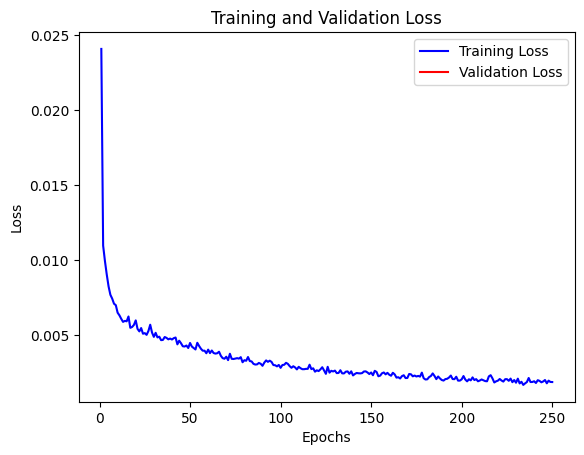

In [17]:
history=model.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test),verbose=1)


training_loss = history.history['loss']
validation_loss = history.history['val_loss']
epochs = range(1, len(training_loss) + 1)  # Assuming you trained for 1000 epochs

plt.plot(epochs, training_loss, 'b', label='Training Loss')
plt.plot(epochs, validation_loss, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
#LSTM
history_LSTM=model_LSTM.fit(X_train, y_train, epochs=250, batch_size=128, validation_data=(X_test, y_test),verbose=1)


training_loss_LSTM = history_LSTM.history['loss']
validation_loss_LSTM = history_LSTM.history['val_loss']
epochs = range(1, len(training_loss) + 1)  # Assuming you trained for 1000 epochs

plt.plot(epochs, training_loss_LSTM, 'b', label='Training Loss')
plt.show()
plt.plot(epochs, validation_loss_LSTM, 'r', label='Validation Loss')
plt.title('Training and Validation Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

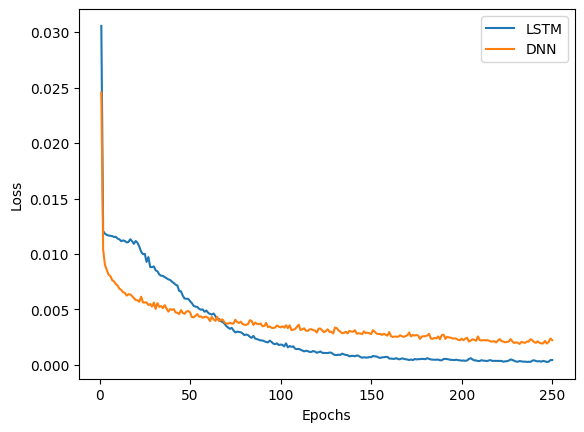

In [ ]:
plt.plot(epochs, training_loss_LSTM, label='LSTM')
plt.plot(epochs, training_loss,label='DNN')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend()
plt.show()

In [ ]:
score = model.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.930400013923645


In [ ]:
#LSTM
score = model_LSTM.evaluate(X_test, y_test, verbose=0)
print('Test loss:', score[0])
print('Test accuracy:', score[1])

Test loss: nan
Test accuracy: 0.9312000274658203


# Offset from real Data


In [18]:

delta=0.05
df2=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/resampleBird2Filter_norm')
df2['roll'] = df2['roll']+delta
df2['pitch'] = df2['pitch']+delta
df2['yaw'] = df2['yaw']+delta
df2['x_norm']=df2['x_norm']+delta
df2['y_norm']=df2['y_norm']+delta
df2['alt_norm']=df2['alt_norm']+delta

157/157 [==============================] - 0s 2ms/step


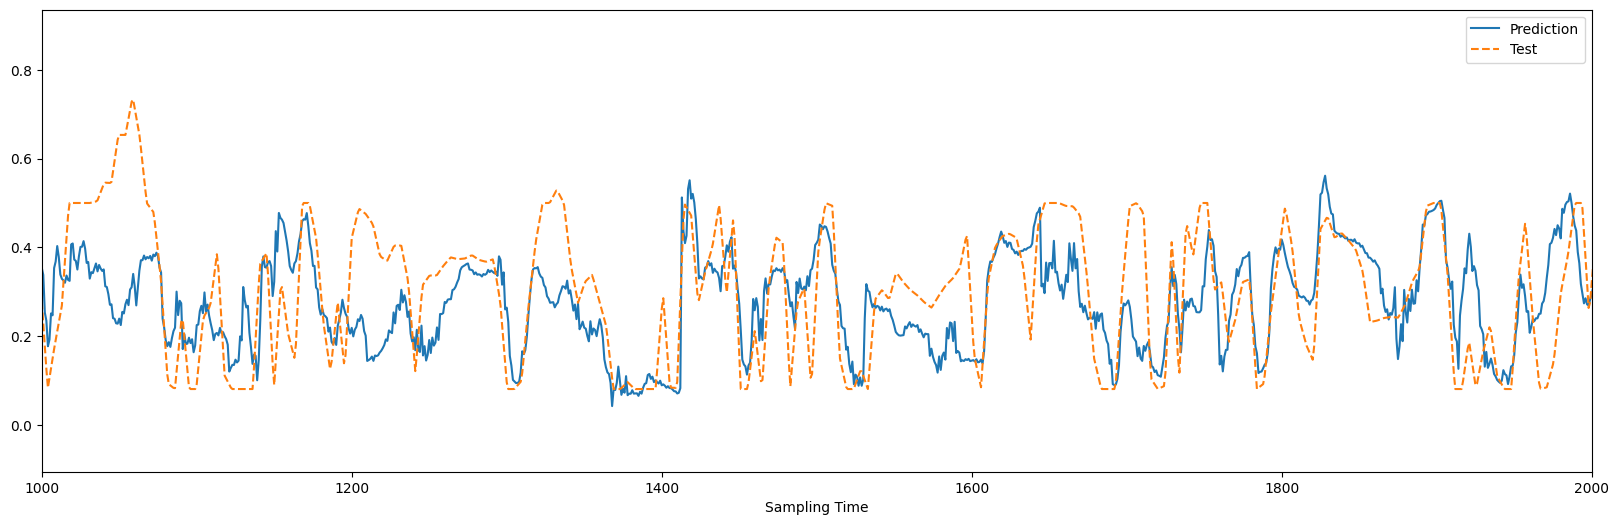

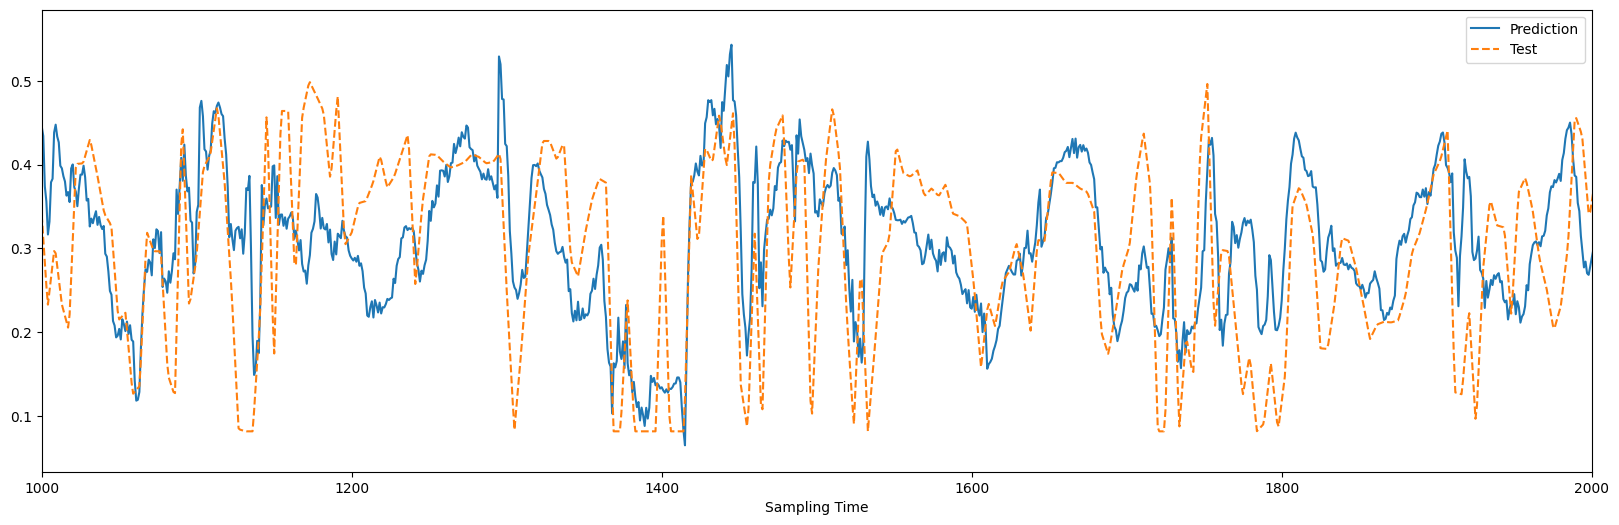

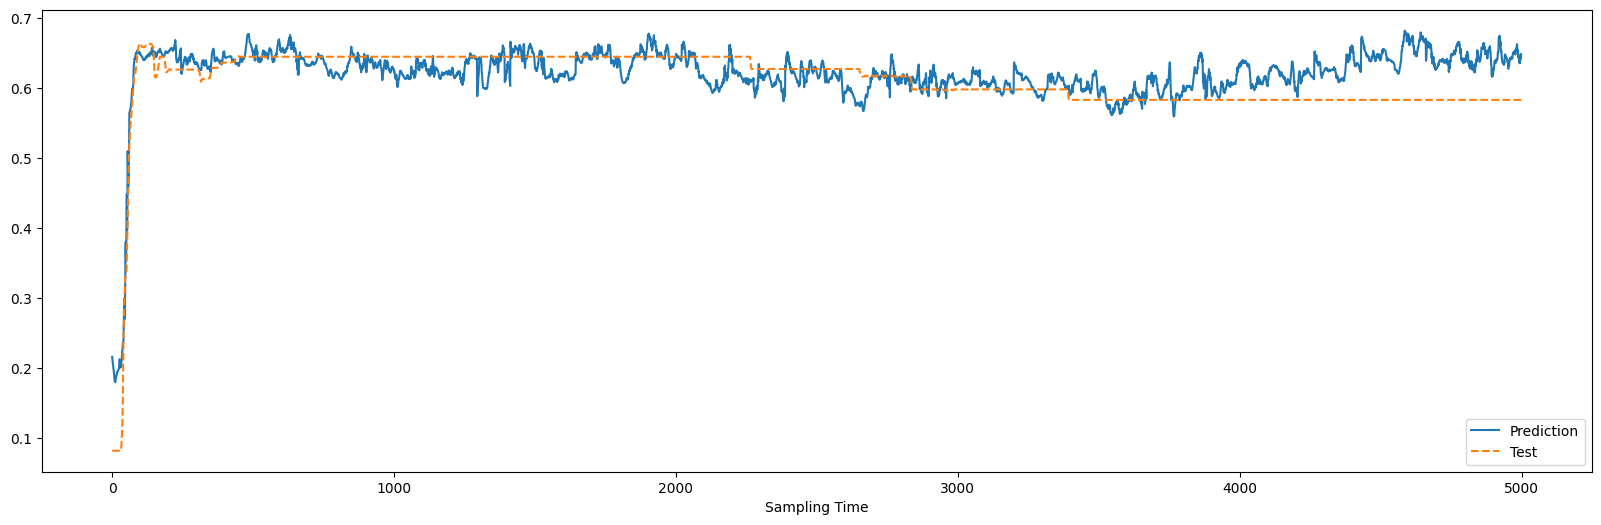

In [19]:
df_test=df2[['time_diff','roll','pitch','yaw','x_norm','y_norm','alt_norm']]
predictions = model.predict(df_test) #Prediction
plt.figure(figsize=(20, 6))
plt.plot(predictions[:,0], label='Prediction')
plt.plot(df['c1_roll'],'--',label='Test')
plt.xlabel('Sampling Time')
plt.xlim(1000,2000)
plt.legend()
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(predictions[:,1],label='Prediction')
plt.plot(df['c2_pitch'],'--',label='Test')
plt.xlabel('Sampling Time')
plt.xlim(1000,2000)
plt.legend()
plt.show()
plt.figure(figsize=(20, 6))
plt.plot(predictions[:,2],label='Prediction')
plt.plot(df['c3_throttle'],'--',label="Test")
plt.xlabel('Sampling Time')
plt.legend()
plt.show()

# Validation with Bird 1

In [20]:
df_b1=pd.read_csv('/content/drive/MyDrive/Dharambir MasterThesis/NN Code/normBird_data')
df_b1['Time_diff']=df_b1['TimeUS_diff']/1000000
df_b1['Time_diff_norm']=(df_b1['Time_diff']-df_b1['Time_diff'].min())/(df_b1['Time_diff'].max()-df_b1['Time_diff'].min())

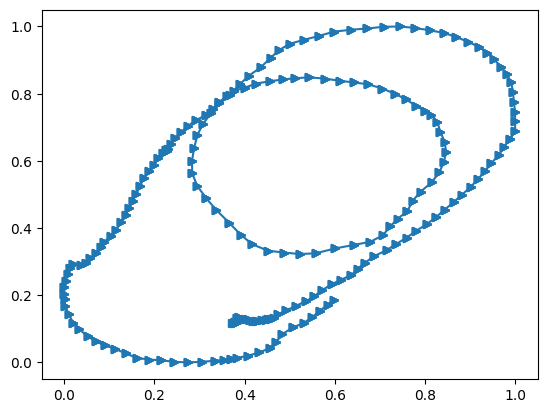

In [21]:
plt.plot(df_b1['x_norm'],df_b1['y_norm'],'->')

33/33 [==============================] - 0s 1ms/step
[[0.32979596 0.29246998 0.6168815 ]
 [0.30505425 0.28090638 0.61565953]
 [0.3074686  0.27756247 0.62006736]
 ...
 [0.12205838 0.04595056 0.55863523]
 [0.1744898  0.03537789 0.56196463]
 [0.19560778 0.07605509 0.56027114]]


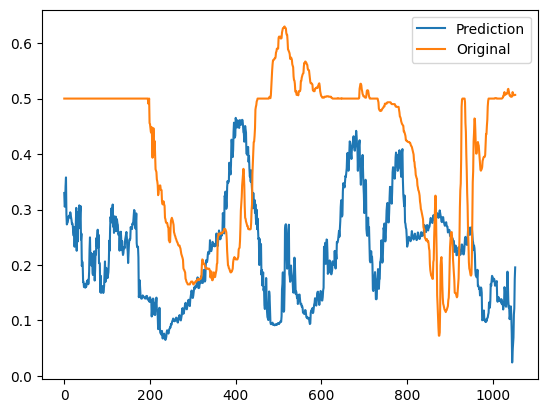

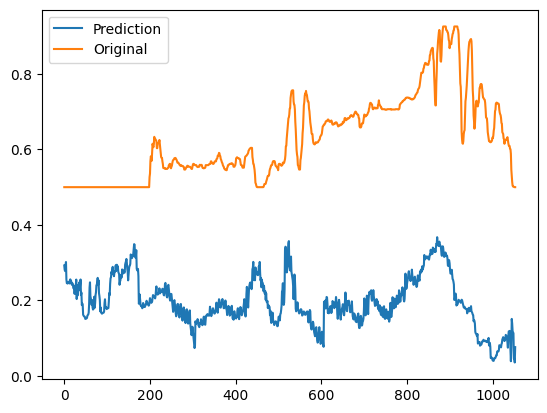

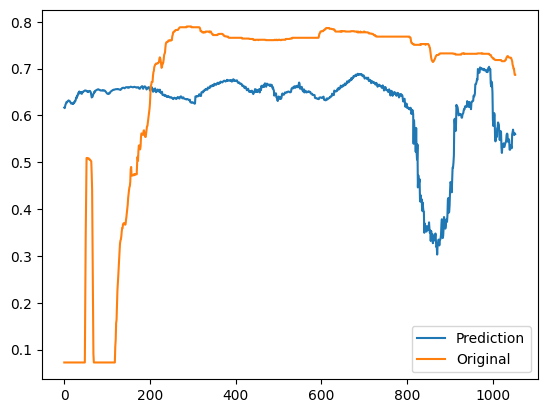

In [22]:
df_test=df_b1[['Time_diff_norm','Roll','Pitch','Yaw','x_norm','y_norm','Alt_norm']]

predictions = model.predict(df_test)
print(predictions)
plt.plot(predictions[:,0],label='Prediction')
plt.plot(df_b1['C1_Roll'],label='Original')
plt.legend()
plt.show()
plt.plot(predictions[:,1],label='Prediction')
plt.plot(df_b1['C2_Pitch'],label='Original')
plt.legend()
plt.show()
plt.plot(predictions[:,2],label='Prediction')
plt.plot(df_b1['C3_Throttle'],label='Original')
plt.legend()
plt.show()

#Testing With path

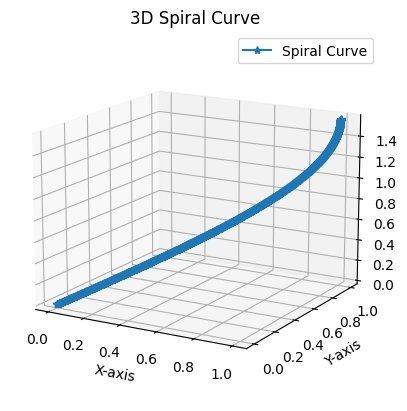

In [23]:
# Define parameters for the spiral
theta = np.linspace(0, 0.5*np.pi, 1000)  # 1000 data points
a = 1  # radius factor
b = 1  # height factor

# Calculate x, y, and z coordinates
x = a * np.sin( theta )
y = a * np.sin(theta)
z = b * theta


# Create the 3D plot
fig = plt.figure()
ax = fig.add_subplot(111, projection='3d')
ax.plot(x, y, z, label='Spiral Curve',marker='*')

# Set labels and title
ax.set_xlabel('X-axis')
ax.set_ylabel('Y-axis')
ax.set_zlabel('Z-axis')
ax.set_title('3D Spiral Curve')

# Add legend
ax.legend()

# Customize the view (optional)
ax.view_init(elev=15, azim=-60)  # Example view angles

plt.show()


32/32 [==============================] - 0s 1ms/step
[[0.39364213 0.29422057 0.55892575]
 [0.39240718 0.29380676 0.55931205]
 [0.39117223 0.293393   0.5596983 ]
 ...
 [0.1856457  0.00903207 0.5192374 ]
 [0.18509045 0.00968665 0.51910454]
 [0.1845344  0.01034284 0.5189717 ]]


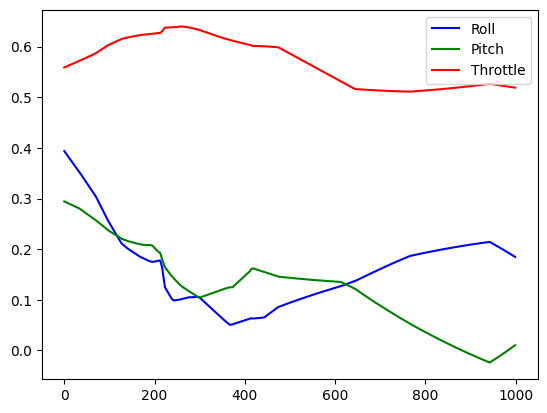

In [24]:
df_sp=pd.DataFrame(columns=['TimeUS','Roll','Pitch','Yaw','x_ax','y_ax','Alt'],index=range(1000))
df_sp['x_ax']=x
df_sp['y_ax']=y
df_sp['Alt']=z
df_sp['TimeUS']=0.9#df_b1['Time_diff_norm'].mean() #0.04 seconds data aquation rate
df_sp['Roll']=0.01
df_sp['Pitch']=0.01
df_sp['Yaw']=0.0001

df_sp['x_ax']=(df_sp['x_ax']-df_sp['x_ax'].min())/(df_sp['x_ax'].max()-df_sp['x_ax'].min())
df_sp['y_ax']=(df_sp['y_ax']-df_sp['y_ax'].min())/(df_sp['y_ax'].max()-df_sp['y_ax'].min())
df_sp['Alt']=(df_sp['Alt']-df_sp['Alt'].min())/(df_sp['Alt'].max()-df_sp['Alt'].min())

df_sp
predictions = model.predict(df_sp)
print(predictions)
plt.plot(predictions[:,0],'b',label='Roll')
plt.plot(predictions[:,1],'g',label='Pitch')
plt.plot(predictions[:,2],'r', label='Throttle')
plt.legend()

In [ ]:
df_sp

,TimeUS,Roll,Pitch,Yaw,x_ax,y_ax,Alt
0,0.111694,0.01,0.01,0.0001,0.000000,0.000000,0.000000
1,0.111694,0.01,0.01,0.0001,0.001572,0.001572,0.001001
2,0.111694,0.01,0.01,0.0001,0.003145,0.003145,0.002002
3,0.111694,0.01,0.01,0.0001,0.004717,0.004717,0.003003
4,0.111694,0.01,0.01,0.0001,0.006289,0.006289,0.004004
...,...,...,...,...,...,...,...
995,0.111694,0.01,0.01,0.0001,0.999980,0.999980,0.995996
996,0.111694,0.01,0.01,0.0001,0.999989,0.999989,0.996997
997,0.111694,0.01,0.01,0.0001,0.999995,0.999995,0.997998
998,0.111694,0.01,0.01,0.0001,0.999999,0.999999,0.998999


In [ ]:
predictions

array([[ 0.31234908,  0.24064198,  0.47397974],
       [ 0.31148452,  0.2364766 ,  0.48481622],
       [ 0.31062007,  0.23231126,  0.49565262],
       ...,
       [-0.11181571, -0.10701609,  0.64008856],
       [-0.11200054, -0.10715729,  0.6400491 ],
       [-0.11218493, -0.1072976 ,  0.6400094 ]], dtype=float32)